In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [3]:
all_res = glob('out/**/*.pkl')

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded['representation']
    num_points = loaded['num_train_points']

    metrics = {
        'representation': loaded['representation'],
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['gpr_baseline']['mean_absolute_error'],
        'max_error': loaded['gpr_baseline']['max_error'],
        'mse': loaded['gpr_baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(['representation', 'num_train_points']).agg(['mean', 'std'])

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [8]:
compiled_grouped_res

mae               max_error  \
                                       mean         std        mean   
representation num_train_points                                       
SMILES         10                 59.133152    8.856563  175.000000   
               20                 66.924112   13.107848  160.166667   
               50                 39.724038    2.875243  205.400000   
               100                34.460548    5.097250  197.400000   
               200                28.205142    5.004111  274.200000   
inchi          10                116.514466   36.937609  355.400000   
               20                 53.482517   15.383598  175.200000   
               50                 38.568031    3.027741  168.166667   
               100                38.206147    4.541330  246.833333   
               200                26.752224    4.619014  156.333333   
name           10                       NaN         NaN         NaN   
               20                289.866222  154.890492  473.749400   
               50                 92.689536   62.744465  178.000000   
               100                42.812120   10.375687  157.142857   
               200                29.858000    5.645395  127.000000   
selfies        10                 63.373657    8.501341  252.500000   
               20                 61.699021   12.335178  219.285714   
               50                 38.161907    2.476963  224.000000   
               100                34.486257    3.820204  178.333333   
               200                30.989416    5.345103  229.142857   

                                                       mse                
                                        std           mean           std  
representation num_train_points                                           
SMILES         10                 33.181320    5631.299114    936.646142  
               20                 14.048725    6748.007875   2093.491301  
               50                 70.450692    3196.109758    313.798425  
               100                54.820617    2491.245908    638.275268  
               200               214.984185    2578.999404   1982.754811  
inchi          10                 85.459347   20146.781291  10346.275987  
               20                 38.251797    4775.260739   2372.891302  
               50                 54.208548    2912.182910    614.212635  
               100               106.540915    3702.476666   1525.067507  
               200                26.575678    1741.914461    631.012699  
name           10                       NaN            NaN           NaN  
               20                 93.690800  100772.815798  89247.166063  
               50                 43.538489   14686.196935  14163.471077  
               100                35.130369    3917.823772   1491.518721  
               200                48.748333    2233.208288   1042.696268  
selfies        10                 44.094595    7065.053798   1582.752499  
               20                 73.195433    6318.676746   2211.119553  
               50                 87.666984    3151.904441    669.523114  
               100                19.064802    2611.103747    430.669469  
               200               113.090566    2742.459711   1773.116144

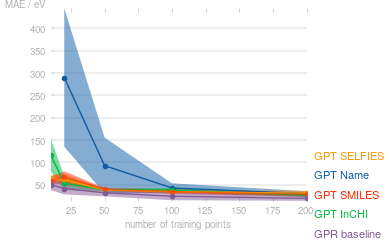

In [9]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)

    ax.plot(
        compiled_grouped_res.loc["name", :].index, 
        compiled_grouped_res.loc["name", :]['mae']['mean'], 
        label='GPT Name', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["name", :].index, 
        compiled_grouped_res.loc["name", :]['mae']['mean'] - compiled_grouped_res.loc["name", :]['mae']['std'], 
        compiled_grouped_res.loc["name", :]['mae']['mean'] + compiled_grouped_res.loc["name", :]['mae']['std'], 
          alpha=.5
    )

    ax.plot(
        compiled_grouped_res.loc["inchi", :].index, 
        compiled_grouped_res.loc["inchi", :]['mae']['mean'], 
        label='GPT InCHI', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["inchi", :].index, 
        compiled_grouped_res.loc["inchi", :]['mae']['mean'] - compiled_grouped_res.loc["inchi", :]['mae']['std'], 
        compiled_grouped_res.loc["inchi", :]['mae']['mean'] + compiled_grouped_res.loc["inchi", :]['mae']['std'], 
          alpha=.5
    )


    ax.plot(
        compiled_grouped_res.loc["selfies", :].index, 
        compiled_grouped_res.loc["selfies", :]['mae']['mean'], 
        label='GPT SELFIES', 
        marker='o',
    )

    ax.fill_between(
        compiled_grouped_res.loc["selfies", :].index, 
        compiled_grouped_res.loc["selfies", :]['mae']['mean'] - compiled_grouped_res.loc["selfies", :]['mae']['std'], 
        compiled_grouped_res.loc["selfies", :]['mae']['mean'] + compiled_grouped_res.loc["selfies", :]['mae']['std'], 
          alpha=.5
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'], 
        label='GPT SMILES',
        marker='o',
          alpha=.5
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] - compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] + compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
          alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='GPR baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    #ax.set_xscale('log')
    #ax.set_yscale('symlog')
fig.savefig('phoswitch_regression_res.pdf', bbox_inches='tight')
